## Naive Bayes

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
plt.rcParams['figure.figsize']=(20.0,10.0)

In [2]:
#importing the dataset
dataset=pd.read_csv('C:/Users/Bharathi/Downloads/purchase_salary.csv')
dataset.shape


(400, 5)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [6]:
pd.unique(dataset['Purchased'])

array([0, 1], dtype=int64)

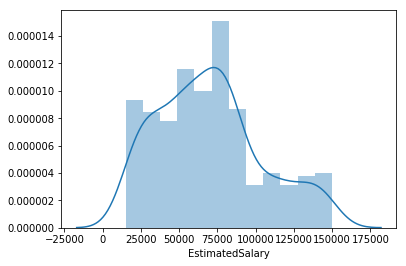

In [7]:
sb.distplot(dataset['EstimatedSalary'])

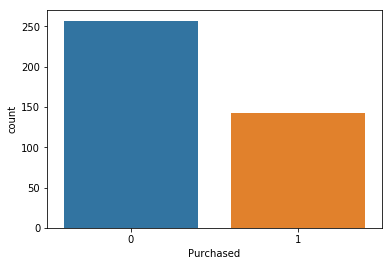

In [8]:
sb.countplot(x='Purchased',data=dataset)

In [9]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=101)

In [10]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
#Fitting Naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
#Predicting the Test set results
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [13]:
classifier.score(X_test,y_test)

0.85

In [14]:
X_new=sc.transform([[42,100000]])
classifier.predict(X_new)

array([1], dtype=int64)

In [15]:
#Evaluating the algorithm
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[22  5]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.71      0.92      0.80        13

   micro avg       0.85      0.85      0.85        40
   macro avg       0.83      0.87      0.84        40
weighted avg       0.88      0.85      0.85        40

